In [4]:
import numpy as np
import pandas as pd
from titanic_visualization import survival_stats
from IPython.display import display
%matplotlib inline

in_file="titanic_data.csv"
full_data=pd.read_csv(in_file)

display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
outcomes=full_data['Survived']
data=full_data.drop('Survived',axis=1)

display(data.head)

<bound method DataFrame.head of      PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
5              6       3                                   Moran, Mr. James   
6              7       1                            McCarthy, Mr. Timothy J   
7              8       3                     Palsson, Master. Gosta Leonard   
8              9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9             10       2                Nasser, Mrs. Nicholas (Adele Achem)   
10            11       3                    Sandstrom, Miss. Marguerite Rut   
11            12    

In [7]:
def accuracy_score(truth,pred):
    if len(truth)==len(pred):
        return 'prediction have an accuracy of {:.2f}%.'.format((truth==pred).mean()*100)
    else:
        return 'Number of predictions does not match number of outcomes!'
    
    
predictions=pd.Series(np.ones(5,dtype=int))
print accuracy_score(outcomes[:5],predictions)


prediction have an accuracy of 60.00%.


In [8]:
def predictions_0(data):
    predictions=[]
    for _,passenger in data.iterrows():
        predictions.append(0)
        
    return pd.Series(predictions)


predictions=predictions_0(data)

In [9]:
print accuracy_score(outcomes,predictions)

prediction have an accuracy of 61.62%.


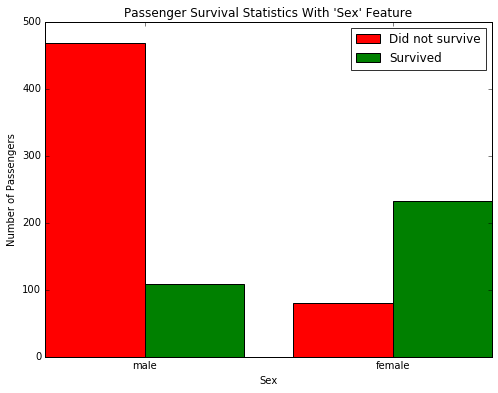

In [10]:
survival_stats(data,outcomes,'Sex')

In [26]:
def predictions_1(data):
    predictions=[]
    for _,passenger in data.iterrows():
        if passenger["Sex"]=="female":
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)

predictions=predictions_1(data)

                

In [27]:
print accuracy_score(outcomes,predictions)

prediction have an accuracy of 78.68%.


In [ ]:
survival_stats(data,outcomes,"Age",["Sex=='male'"])

In [30]:
def predictions_2(data):
    predictions=[]
    for _, passenger in data.iterrows():
        if passenger["Sex"]=="female":
            predictions.append(1)
        elif passenger["Sex"] == "male" and passenger["Age"] <10:
            predictions.append(1)
        else:
            predictions.append(0)
            
            
    return pd.Series(predictions)        


predictions=predictions_2(data)
        

In [31]:
print accuracy_score(outcomes,predictions)

prediction have an accuracy of 79.35%.


In [ ]:
survival_stats(data,outcomes,"Age",["Sex=='male'","Age<18"])

In [33]:
def predictions_3(data):
    predictions=[]
    for _, passenger in data.iterrows():
        if passenger["Sex"]=="female":
            predictions.append(1)
        elif passenger["Sex"] == "male" and passenger["Age"] <18:
            predictions.append(1)
        else:
            predictions.append(0)
            
            
    return pd.Series(predictions)        


predictions=predictions_3(data)
print accuracy_score(outcomes,predictions)        

prediction have an accuracy of 77.33%.
